Tweets Before COP26

In [1]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
tweets_list3 = []
maxTweets = 50000

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('climate change since:2021-11-13 until:2022-05-13').get_items()):
    if i>maxTweets:
        break
    tweets_list3.append([tweet.date, tweet.content, tweet.user.location])
    

tweets_to_df3 = pd.DataFrame(tweets_list3, columns=['Datetime','Tweets','Location'])

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) 
    text = re.sub('#','',text) 
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text
tweets_to_df3['cleanedTweets'] = tweets_to_df3['Tweets'].apply(cleanTweets) 
tweets_to_df3.head()


def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity
tweets_to_df3['Subjectivity'] = tweets_to_df3['cleanedTweets'].apply(getSubjectivity)
tweets_to_df3['Polarity'] = tweets_to_df3['cleanedTweets'].apply(getPolarity)
tweets_to_df3.drop('Tweets', axis=1).head() 

,Datetime,Location,cleanedTweets,Subjectivity,Polarity
0,2022-05-12 23:59:57+00:00,,Climate change panic -fact the cleaner the air...,0.500000,0.500000
1,2022-05-12 23:59:56+00:00,Bristol,"I bet you're a flat earthing, moon landing an...",0.125000,-0.025000
2,2022-05-12 23:59:45+00:00,,Climate Change is an existential threat. Cov...,0.000000,0.000000
3,2022-05-12 23:59:42+00:00,Australia,Digital technology allowing extreme wealth co...,0.341964,0.107589
4,2022-05-12 23:59:39+00:00,,EVERYONE knows climate change is a scam. EVER...,0.500000,0.250000


In [ ]:
tweets_to_df3.to_csv('COP26(3)50k.csv') 
cop26_c = pd.read_csv('COP26(3)50k.csv',index_col=0)

Sentiment Label

In [4]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
cop26_c['Analysis'] = cop26_c['Polarity'].apply(getAnalysis)

In [5]:
cop26_c['Analysis'].value_counts() 

Positive    23790
Neutral     15456
Negative    10755
Name: Analysis, dtype: int64

Bar Graph

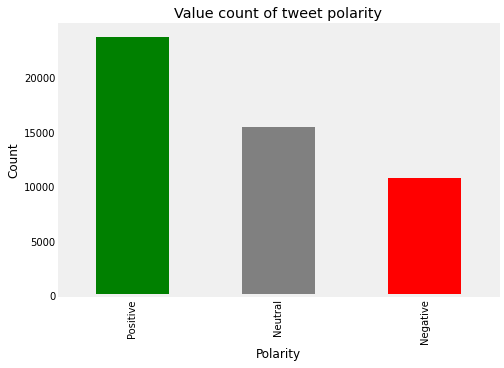

In [6]:
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
cop26_c['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Pie Chart

Text(0.5, 1.0, 'Distribution of polarity')

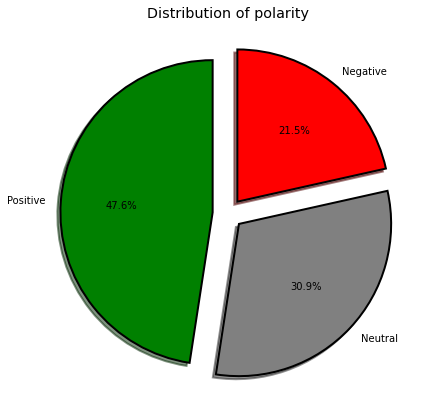

In [7]:
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=cop26_c['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

Scatter Plot

Word Cloud

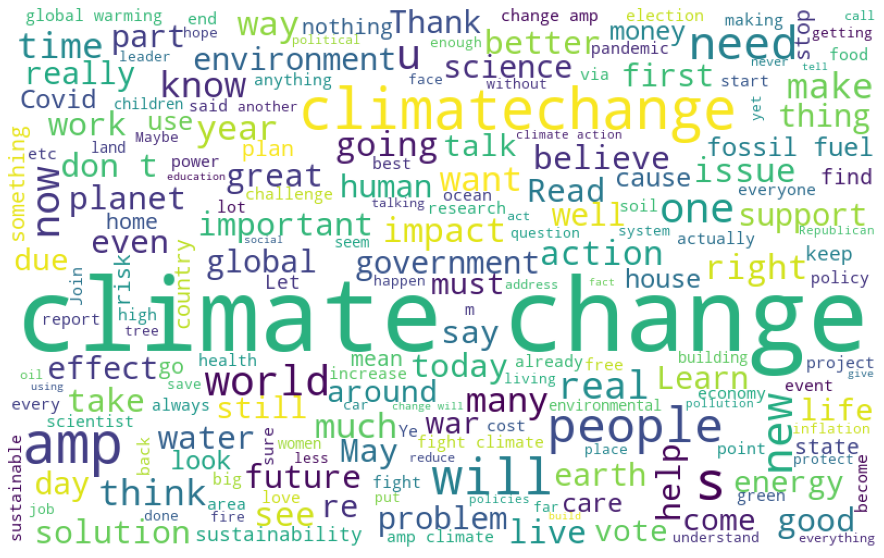

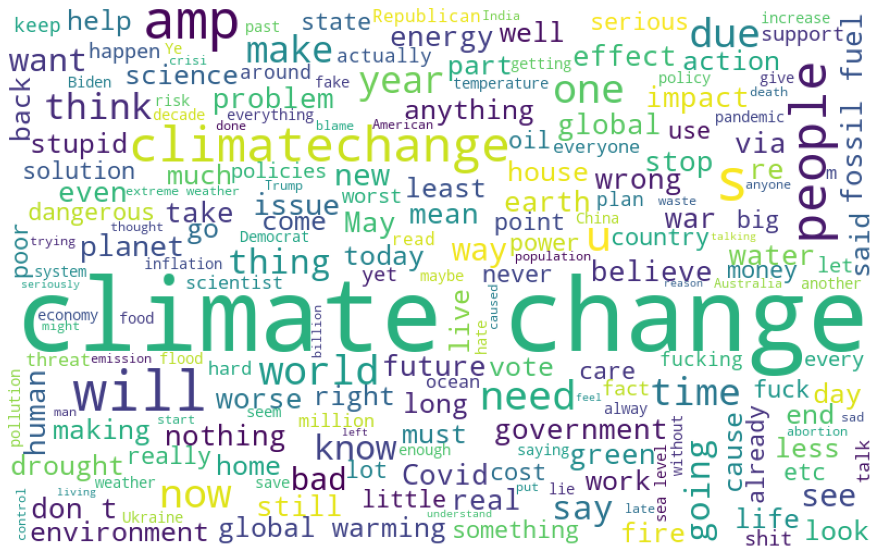

In [9]:
#function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive tweets
posTweets = cop26_c.loc[cop26_c['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)
#wordcloud for negative tweets
negTweets = cop26_c.loc[cop26_c['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

Most Popular Words

In [ ]:
cop26_c.dropna(subset=['cleanedTweets'], inplace=True)
cop26_c.isnull().sum()

Datetime             0
Tweets               0
Location         30349
cleanedTweets        0
Subjectivity         0
Polarity             0
Analysis             0
dtype: int64

In [ ]:
#break each tweet sentence into words
sentences = []
for word in cop26_c['cleanedTweets']:
    sentences.append(word)
sentences
lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] #shows first 10 words in the first tweet

['Climate',
 'change',
 'panic',
 '-fact',
 'the',
 'cleaner',
 'the',
 'air',
 'is',
 'more']

In [ ]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#creates a new dataframe for the stem and shows the count of the most used words
df = pd.DataFrame(stem2)
df=df[0].value_counts()
df #shows the new dataframe

climat                    91985
chang                     61109
climatechang              13612
change.                   11843
&amp;                     10861
                          ...  
celeri                        1
impact❓                       1
kan!                          1
corporatesocialrespons        1
oped:                         1
Name: 0, Length: 139562, dtype: int64

c:\Users\shama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


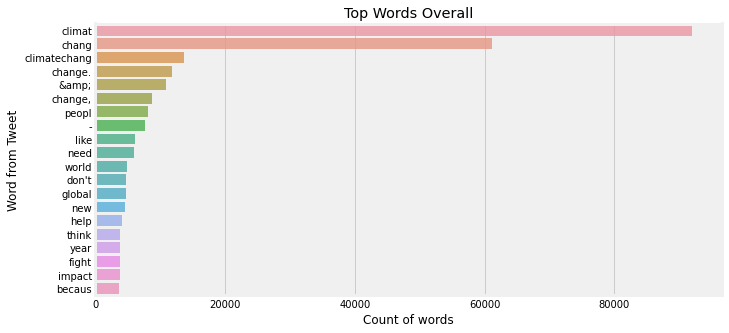

In [ ]:
#plots the top 20 used words
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()